# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Gilang Kurniawan]
- **Email:** [gilangk561@gmail.com]
- **ID Dicoding:** [gilangkrnwnn]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Demografi pelanggan berdasarkan metode payment yang kita miliki?
- Pertanyaan 2: Bagaimanma Demografi pelanggan berdasarkan state yang kita kita miliki?

## Import Semua Packages/Library yang Digunakan

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [126]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head() ## Memuat tabel order payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [127]:
product_df = pd.read_csv("products_dataset.csv")
product_df.head() ## Memuat tabel order product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [128]:
orders_df = pd.read_csv("orders_dataset.csv")

In [129]:
customers_df = pd.read_csv("customers_dataset.csv")

### Assessing Data

In [130]:
order_payments_df.info() ## Menilai data order payment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [131]:
product_df.info() ## Menilai data product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [132]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [133]:
order_payments_df.isna().sum() #pengecekan tidak ada missing value di tabel order payment

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [134]:
product_df.isna().sum() # adanya missing value di tabel product

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [135]:
customers_df.isna().sum() #tidak ada missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [136]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum()) # Tidak ada duplikasi data di tabel order payment

Jumlah duplikasi:  0


In [137]:
print("Jumlah duplikasi: ", product_df.duplicated().sum()) # Tidak ada duplikasi data di tabel product

Jumlah duplikasi:  0


In [138]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) # Tidak ada duplikasi pada tabel customers

Jumlah duplikasi:  0


In [139]:
order_payments_df.describe() # Parameter statistik dari tabel order payment

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [140]:
product_df.describe() # Parameter statistik dari tabel product

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [141]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Cleaning Data

In [142]:
product_df[product_df.product_category_name.isna()] # Menangani missing value di kolom product_category_name

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [143]:
# Metode Imputation
product_df.product_category_name.value_counts() # Saya menggunakan value_counts() untuk mengidetifikasi nilai yang dominan

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [144]:
product_df.fillna(value="cama_mesa_banho", inplace=True) # Nama Product cama_mesa_banho yang paling dominan

In [145]:
product_df.isna().sum() # Hasil Cleaning

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [146]:
order_payments_df.describe(include="all") # Rangkuman parameter statistik tabel order payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [147]:
product_df.describe(include="all") # Rangkuman parameter statistik tabel product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,cama_mesa_banho,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [148]:
product_df.groupby(by="product_id").agg({
    "product_id": "nunique",
    "product_width_cm": ["min", "max"]
}) ## Mencari Product terlebar

product_id product_width_cm      
                                    nunique              min   max
product_id                                                        
00066f42aeeb9f3007548bb9d3f33c38          1             16.0  16.0
00088930e925c41fd95ebfe695fd2655          1             26.0  26.0
0009406fd7479715e4bef61dd91f2462          1             35.0  35.0
000b8f95fcb9e0096488278317764d19          1             12.0  12.0
000d9be29b5207b54e86aa1b1ac54872          1             15.0  15.0
...                                     ...              ...   ...
fff6177642830a9a94a0f2cba5e476d1          1             15.0  15.0
fff81cc3158d2725c0655ab9ba0f712c          1             11.0  11.0
fff9553ac224cec9d15d49f5a263411f          1             11.0  11.0
fffdb2d0ec8d6a61f0a0a0db3f25b441          1             13.0  13.0
fffe9eeff12fcbd74a2f2b007dde0c58          1             11.0  11.0

[32951 rows x 3 columns]

In [149]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


In [150]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [151]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [152]:
all_df = pd.merge(
    left=order_payments_df,
    right=customers_df,
    how="left",
    left_on="order_id",
    right_on="customer_id"
)
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,NaN,NaN,NaN,NaN,NaN
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,NaN,NaN,NaN,NaN,NaN
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,NaN,NaN,NaN,NaN,NaN
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,NaN,NaN,NaN,NaN,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,NaN,NaN,NaN,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi pelanggan berdasarkan metode payment yang kita miliki?

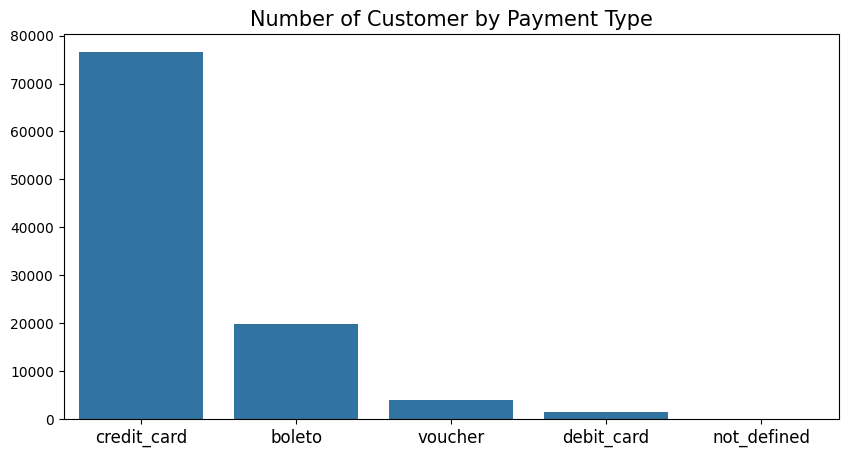

In [153]:
bypayment_df = all_df.groupby(by="payment_type").order_id.nunique().reset_index()
bypayment_df.rename(columns ={
    "order_id": "order_count"
}, inplace=True)

plt.figure(figsize=(10,5))

sns.barplot(
    y = "order_count",
    x = "payment_type",
    data = bypayment_df.sort_values(by="order_count", ascending=False)
)

plt.title("Number of Customer by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana Demografi pelanggan berdasarkan state yang kita kita miliki?

In [154]:
all_customer = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [155]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


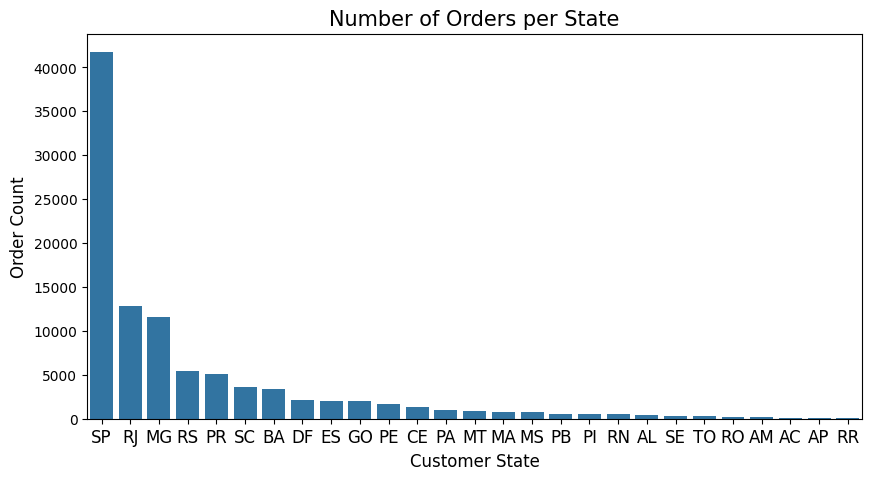

In [156]:
bycity_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bycity_df.rename(columns ={
    "customer_id": "order_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(
    y="order_count",
    x="customer_state",
    data=bycity_df.sort_values(by="order_count", ascending=False)
)

# Set informative title and labels
plt.title("Number of Orders per State", loc="center", fontsize=15)
plt.ylabel("Order Count", fontsize=12)  # Add label for y-axis
plt.xlabel("Customer State", fontsize=12)  # Add label for x-axis
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [157]:
all_df.to_csv("all_data.csv", index=False)

In [158]:
all_customer.to_csv("all_customer_join_orders.csv",index=False)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan demografi pelanggan berdasarkan metode payment, Credit Card di grafik tertinggi.  
- Conclution pertanyaan 2: Berdasarkan demografi pelanggan berdasarkan state, SP ada di grafik tertinggi.